### **Access Dataset from Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Business'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Business


In [ ]:
%ls

FFNN_Model_on_patents.ipynb  patent.h5        patent_trainingdata.csv
patent_accuracy.png          patent_loss.png  patent_weights.hdf5


### **Importing libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras import models,Sequential, layers
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing


%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Data Preprocessing**

In [ ]:
#Reading csv file from dataset
data = pd.read_csv("patent_trainingdata.csv")  

In [ ]:
#Analyzing dataset by looking at first 5 values
data.head()

,reg_num,number_ipc,number_word_abstract,number_word_ft,number_citation,number_citation_nation,number_priority,number_priority_nation,number_claim,number_claim_indep,number_claim_dep,number_claim_altered,number_applicant,number_foreign_applicant,number_applicant_nation,number_assignee,number_avgword_indep,average_gap_citation,delivery_time,number_family,number_foreign_family,number_family_nation,ipc_A,ipc_B,ipc_C,ipc_D,ipc_E,ipc_F,ipc_G,ipc_H,ipc_activity,ipc_comp,ipc_size,CBPs
0,6512831,5,129,149,17,1,0,0,15,15,0,0,2,2,1,1,46,16,4,11,11,6,1,0,0,0,0,1,1,1,800.20,2.330443,3024.2000,1
1,6970090,5,146,6369,9,1,0,0,22,4,18,0,1,0,1,0,98,8,2,0,0,0,1,0,0,0,0,1,1,1,751.25,1.928689,4385.5000,0
2,7752789,11,126,5516,3,1,1,1,18,3,15,2,2,2,1,2,238,17,3,4,2,2,1,0,0,0,0,1,1,1,640.50,2.177702,5576.5000,0
3,7188703,7,144,6420,25,4,1,1,17,1,16,0,2,2,1,1,232,9,2,10,8,5,0,1,0,0,0,1,1,1,712.50,2.357421,5181.1667,0
4,6418781,4,145,154,19,1,1,1,3,3,0,0,5,5,1,1,127,16,3,7,7,5,0,1,0,0,0,1,1,1,1915.75,2.417015,5485.7500,0


In [ ]:
#Deleting unneccessary columns from our data

del data['reg_num']
del data['number_claim']

In [ ]:
data.describe(include = 'all')

,number_ipc,number_word_abstract,number_word_ft,number_citation,number_citation_nation,number_priority,number_priority_nation,number_claim_indep,number_claim_dep,number_claim_altered,number_applicant,number_foreign_applicant,number_applicant_nation,number_assignee,number_avgword_indep,average_gap_citation,delivery_time,number_family,number_foreign_family,number_family_nation,ipc_A,ipc_B,ipc_C,ipc_D,ipc_E,ipc_F,ipc_G,ipc_H,ipc_activity,ipc_comp,ipc_size,CBPs
count,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,1.589165,114.210290,5.700186e+03,18.455020,1.485225,0.511210,0.400855,11.286545,6.646160,4.353170,2.47689,1.984785,1.111645,0.93465,107.520205,11.133305,2.789625,13.175915,10.866925,3.277840,0.146355,0.173140,0.115605,0.008390,0.024835,0.078560,0.299645,0.262580,3449.961226,2.501563,18204.478479,0.500000
std,1.110773,72.226458,1.197407e+04,34.346125,1.091832,0.806522,0.493357,13.524096,10.826539,40.672522,1.77434,1.844389,0.372036,0.37023,105.614183,9.040089,1.411948,245.525385,245.352720,3.776829,0.353463,0.378369,0.319751,0.091212,0.155622,0.269051,0.458104,0.440037,5293.540686,0.492818,32051.862608,0.500001
min,1.000000,0.000000,3.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.00000,0.000000,-164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,79.000000,1.540000e+02,6.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.00000,1.000000,1.000000,1.00000,45.000000,6.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,527.000000,2.248199,2548.000000,0.000000
50%,1.000000,112.000000,1.680000e+02,11.000000,1.000000,0.000000,0.000000,6.000000,1.000000,0.000000,2.00000,2.000000,1.000000,1.00000,77.000000,9.000000,2.000000,4.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1438.000000,2.465129,6949.000000,0.500000
75%,2.000000,144.000000,7.941250e+03,19.000000,1.000000,1.000000,1.000000,17.000000,11.000000,4.000000,3.00000,3.000000,1.000000,1.00000,142.000000,14.000000,3.000000,9.000000,7.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3409.000000,2.697965,18973.687500,1.000000
max,33.000000,22004.000000,1.206389e+06,1531.000000,45.000000,30.000000,5.000000,694.000000,274.000000,5357.000000,32.00000,32.000000,6.000000,13.00000,13639.000000,1008.000000,22.000000,9809.000000,9806.000000,51.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,41590.000000,20.000000,294445.000000,1.000000


In [ ]:
# Normalizing all the values in the columns in the range of (0,1)

x = data.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled)

In [ ]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,0.12500,0.005863,0.000095,0.011104,0.022222,0.000000,0.0,0.021614,0.000000,0.000000,0.032258,0.06250,0.0,0.076923,0.003373,0.153584,0.181818,0.001121,0.001122,0.117647,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.019217,0.070023,0.010267,1.0
1,0.12500,0.006635,0.005251,0.005879,0.022222,0.000000,0.0,0.005764,0.065693,0.000000,0.000000,0.00000,0.0,0.000000,0.007185,0.146758,0.090909,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.018040,0.048878,0.014891,0.0
2,0.31250,0.005726,0.004544,0.001960,0.022222,0.033333,0.2,0.004323,0.054745,0.000373,0.032258,0.06250,0.0,0.153846,0.017450,0.154437,0.136364,0.000408,0.000204,0.039216,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.015377,0.061984,0.018936,0.0
3,0.18750,0.006544,0.005294,0.016329,0.088889,0.033333,0.2,0.001441,0.058394,0.000000,0.032258,0.06250,0.0,0.076923,0.017010,0.147611,0.090909,0.001019,0.000816,0.098039,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.017108,0.071443,0.017593,0.0
4,0.09375,0.006590,0.000099,0.012410,0.022222,0.033333,0.2,0.004323,0.000000,0.000000,0.129032,0.15625,0.0,0.076923,0.009312,0.153584,0.136364,0.000714,0.000714,0.098039,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.046040,0.074580,0.018627,0.0
5,0.09375,0.002999,0.000095,0.019595,0.022222,0.000000,0.0,0.043228,0.000000,0.001307,0.064516,0.09375,0.0,0.076923,0.004546,0.146758,0.136364,0.000714,0.000510,0.039216,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.035081,0.059703,0.023031,1.0
6,0.12500,0.008408,0.000100,0.002613,0.022222,0.000000,0.0,0.050432,0.000000,0.000000,0.096774,0.12500,0.0,0.076923,0.002346,0.148464,0.136364,0.000510,0.000306,0.058824,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.055207,0.129457,0.035523,1.0
7,0.12500,0.003954,0.003709,0.005225,0.066667,0.033333,0.2,0.001441,0.010949,0.001307,0.000000,0.03125,0.0,0.076923,0.020163,0.156143,0.181818,0.000714,0.000510,0.098039,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.077557,0.067625,0.098529,0.0
8,0.12500,0.005590,0.000098,0.009144,0.022222,0.000000,0.0,0.010086,0.000000,0.000000,0.000000,0.03125,0.0,0.000000,0.004033,0.155290,0.045455,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.009089,0.060496,0.003722,0.0
9,0.12500,0.006544,0.000114,0.005225,0.022222,0.033333,0.2,0.018732,0.000000,0.000000,0.032258,0.06250,0.0,0.076923,0.005646,0.147611,0.090909,0.000612,0.000612,0.078431,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.013407,0.067835,0.005651,0.0


# ***Splitting dataset into training data and test data***

In [ ]:
#Stratified Sampling for splitting dataset using CBPs

split = StratifiedShuffleSplit(n_splits=1, test_size=0.250, random_state=42)
for train_index, test_index in split.split(data, data[31]):
    train_set = data.loc[train_index] # Training set
    test_set = data.loc[test_index] # Test set

In [ ]:
#Checking distribution of training data
train_set[31].value_counts() / len(train_set)

0.0    0.5
1.0    0.5
Name: 31, dtype: float64

In [ ]:
#Checking distribution of test data
test_set[31].value_counts()/len(train_set)

1.0    0.166667
0.0    0.166667
Name: 31, dtype: float64

In [ ]:
#Checking the data used for training set

train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
165590,0.00000,0.004590,0.000111,0.005225,0.022222,0.033333,0.2,0.038905,0.000000,0.002613,0.000000,0.03125,0.0,0.076923,0.003593,0.149317,0.090909,0.000306,0.000102,0.039216,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.094544,0.078419,0.049201,1.0
8860,0.00000,0.002181,0.000104,0.013063,0.022222,0.000000,0.0,0.030259,0.000000,0.002987,0.000000,0.03125,0.0,0.076923,0.002493,0.151024,0.090909,0.000306,0.000102,0.039216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.010556,0.076555,0.004551,1.0
170356,0.06250,0.003181,0.000102,0.005879,0.022222,0.033333,0.0,0.015850,0.010949,0.000000,0.064516,0.09375,0.0,0.230769,0.003299,0.149317,0.181818,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.132751,0.134048,0.116786,0.0
11052,0.00000,0.008771,0.003891,0.007185,0.044444,0.000000,0.0,0.004323,0.062044,0.000000,0.032258,0.00000,0.0,0.076923,0.010118,0.147611,0.181818,0.000306,0.000102,0.039216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.009065,0.073517,0.007220,1.0
150531,0.03125,0.007317,0.000106,0.011104,0.022222,0.000000,0.0,0.024496,0.000000,0.000000,0.000000,0.03125,0.0,0.076923,0.004986,0.154437,0.045455,0.000408,0.000408,0.039216,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001022,0.047721,0.000379,1.0


In [ ]:
#Checking the data used for test set

test_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
62016,0.0,0.007590,0.000109,0.001960,0.022222,0.000000,0.0,0.000000,0.003650,0.000000,0.000000,0.03125,0.0,0.076923,0.000000,0.146758,0.136364,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.015028,0.070876,0.007906,0.0
182907,0.0,0.004181,0.001824,0.015676,0.111111,0.000000,0.0,0.005764,0.058394,0.000000,0.064516,0.00000,0.0,0.076923,0.010778,0.152730,0.090909,0.000204,0.000000,0.019608,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008175,0.060503,0.007808,0.0
37714,0.0,0.001818,0.005957,0.007838,0.066667,0.033333,0.2,0.001441,0.021898,0.000373,0.032258,0.06250,0.0,0.076923,0.010558,0.145904,0.181818,0.000918,0.000714,0.117647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.059270,0.062343,0.072951,0.0
107636,0.0,0.005408,0.009324,0.001960,0.022222,0.000000,0.0,0.004323,0.054745,0.000373,0.129032,0.03125,0.2,0.076923,0.013711,0.144198,0.272727,0.000204,0.000000,0.019608,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.090699,1.000000,0.0
90776,0.0,0.006317,0.000107,0.018289,0.022222,0.000000,0.0,0.033141,0.000000,0.002240,0.064516,0.09375,0.0,0.076923,0.004106,0.148464,0.090909,0.000204,0.000000,0.019608,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.272211,0.077167,0.110153,0.0


In [ ]:
# Getting size of the trainset (m x n)

print(train_set)

             0         1         2   ...        29        30   31
165590  0.00000  0.004590  0.000111  ...  0.078419  0.049201  1.0
8860    0.00000  0.002181  0.000104  ...  0.076555  0.004551  1.0
170356  0.06250  0.003181  0.000102  ...  0.134048  0.116786  0.0
11052   0.00000  0.008771  0.003891  ...  0.073517  0.007220  1.0
150531  0.03125  0.007317  0.000106  ...  0.047721  0.000379  1.0
...         ...       ...       ...  ...       ...       ...  ...
60030   0.00000  0.004317  0.000094  ...  0.071808  0.005583  1.0
163644  0.00000  0.013134  0.000105  ...  0.075765  0.035844  0.0
128887  0.06250  0.004636  0.000100  ...  0.092429  0.016272  1.0
65409   0.00000  0.006908  0.000126  ...  0.055703  0.012281  0.0
44623   0.00000  0.004136  0.000097  ...  0.085955  0.134097  1.0

[150000 rows x 32 columns]


In [ ]:
# Splitting X_train, y_train, X_test and y_test

X_train = train_set.iloc[:,0:31]

y_train = train_set.iloc[:,31]

X_test = test_set.iloc[:,0:31]

y_test = test_set.iloc[:,31]

# ***Developing Feed Forward Neural Network Model***

In [ ]:
# Defining number of input nodes

number_of_features = 31

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=128, activation='relu', input_shape=(number_of_features,)))

# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.45))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=128, activation='relu'))

# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.50))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=128, activation='relu'))

# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.45))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))

In [ ]:
# Compiling the network for defining optimizers, loss function and metrics
network.compile(loss='binary_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy']) 

In [ ]:
# Fitting the model to train for number of epochs and batch size
history = network.fit(X_train, y_train, 
                      epochs = 2500, 
                      verbose=1, 
                      batch_size=512, 
                      validation_data=(X_test, y_test)) 

Streaming output truncated to the last 5000 lines.
293/293 [==============================] - 1s 4ms/step - loss: 0.6532 - accuracy: 0.6020 - val_loss: 0.6010 - val_accuracy: 0.6737
Epoch 2/2500
293/293 [==============================] - 1s 4ms/step - loss: 0.6021 - accuracy: 0.6737 - val_loss: 0.5789 - val_accuracy: 0.6930
Epoch 3/2500
293/293 [==============================] - 1s 4ms/step - loss: 0.5867 - accuracy: 0.6876 - val_loss: 0.5705 - val_accuracy: 0.6990
Epoch 4/2500
293/293 [==============================] - 1s 4ms/step - loss: 0.5786 - accuracy: 0.6926 - val_loss: 0.5647 - val_accuracy: 0.7017
Epoch 5/2500
293/293 [==============================] - 1s 3ms/step - loss: 0.5733 - accuracy: 0.6949 - val_loss: 0.5613 - val_accuracy: 0.7023
Epoch 6/2500
293/293 [==============================] - 1s 3ms/step - loss: 0.5701 - accuracy: 0.6970 - val_loss: 0.5579 - val_accuracy: 0.7035
Epoch 7/2500
293/293 [==============================] - 1s 3ms/step - loss: 0.5662 - accuracy: 0.6

In [ ]:
# Saving the model weights to drive
network.save('patent.h5')
network.save_weights('patent_weights.hdf5')

In [ ]:
# Evaluating the model to evaluate accuracy
eval_model = network.evaluate(X_train, y_train)

4688/4688 [==============================] - 7s 2ms/step - loss: 0.4961 - accuracy: 0.7429


### ***Evaluating Threshold value for classification***

In [ ]:
# Computing F2-Measure using Precision, Recall and beta 
def F2( beta, P, R):
  first = 1 + np.power(beta,2)
  denom = np.multiply(P, (first - 1)) + R
  num = P*R
  return np.divide(np.multiply(first,num),denom)

**Generating set of values for plotting a graph**

In [ ]:
# Creating empty list to draw graphs 
# It may take some time
t  = []
# Creating values of threshold in range of (0.2,0.99)
for i in range(30,80):
  t.append((i+1)/100)
Pr = [ ]
Rr = [ ]
F2r = [ ]

for value in t :
  y_pred = network.predict(X_test)
  y_pred = (y_pred > value) # Predicting output values of test set 
  cn = confusion_matrix(y_test, y_pred) # Defining confusion matrix to compute Precision and Recall 
  P = (cn[0][0]/((cn[1][0])+(cn[0][0])))  # Precision value
  R = (cn[0][0]/((cn[0][1])+(cn[0][0])))  # Recall value
  beta = 2  

  F2r.append(F2( beta, P, R)) # List of values of F2 measure
  Pr.append(P)      # List of values of Precision
  Rr.append(R)      # List of values of Recall 

**Plotting graph for evaluating threshold value**

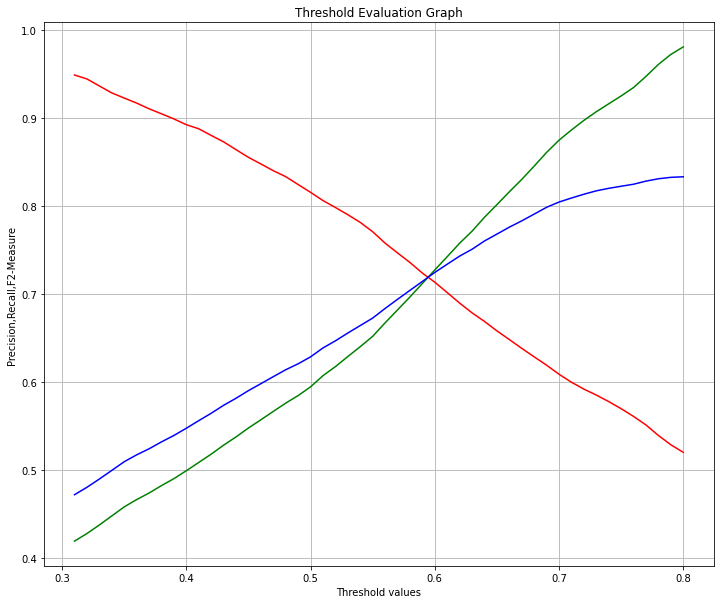

In [ ]:
plt.figure(figsize=(12,10))    # Size of the graph

# Graph of Precision(Pr) vs threshold value(t) in colour red
plt.plot(np.array(t),np.array(Pr),'r')  

# Graph of Recall(Rr) vs threshold value(t) in colour green
plt.plot(np.array(t),np.array(Rr),'g')

# Graph of F2 Measure(F2r) vs threshold value(t) in colour blue
plt.plot(np.array(t),np.array(F2r),'b')

plt.xlabel('Threshold values')
plt.ylabel('Precision,Recall,F2-Measure')
plt.title('Threshold Evaluation Graph')
plt.grid(which = 'major', axis= 'both')
plt.show()

Confusion Matrix with Normalized Values


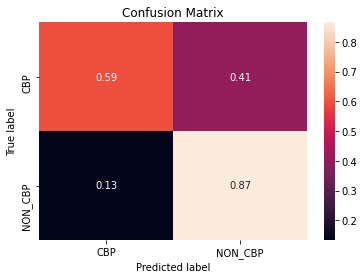

Confusion Matrix without Normalization


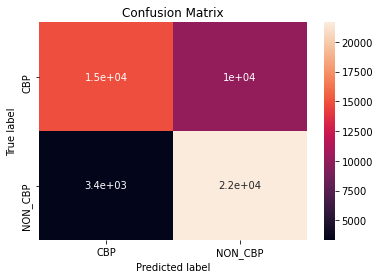

Precision :  0.815373642049819
Recall :  0.59444
F2-Measure : 0.6284996532065705


In [42]:
y_pred = network.predict(X_test)
y_pred = ( y_pred > 0.50)    # Inputting threshold value after evaluation 

def plot_confusion_matrix(normalize):
  classes = ['CBP','NON_CBP']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test, y_pred,normalize=normalize)
  sns.heatmap(cn, annot = True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

cn = confusion_matrix(y_test, y_pred)

P = (cn[0][0]/((cn[1][0])+(cn[0][0])))

R = (cn[0][0]/((cn[0][1])+(cn[0][0])))

def F2( beta, P, R):
  first = 1 + np.power(beta,2)
  denom = np.multiply(P, (first - 1)) + R
  num = P*R
  return np.divide(np.multiply(first,num),denom)

print('Precision : ', P)
print('Recall : ', R)\

beta = 2
print('F2-Measure :',F2(beta,P,R))

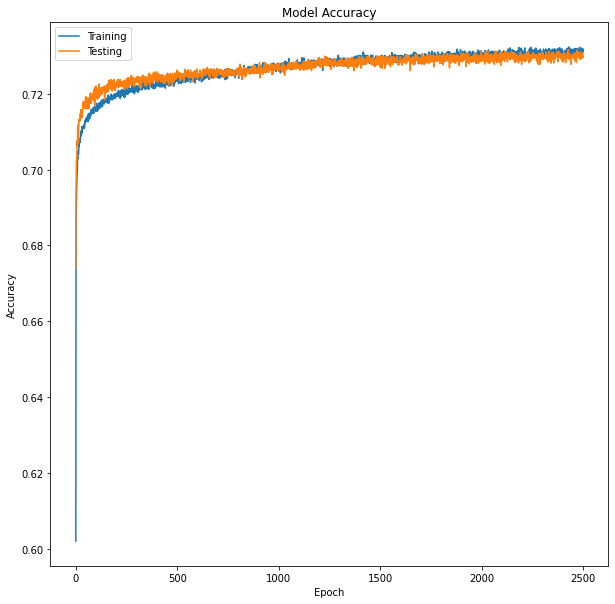

In [ ]:
1plt.figure(figsize=(10,10))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('patent_accuracy.png')
plt.show()

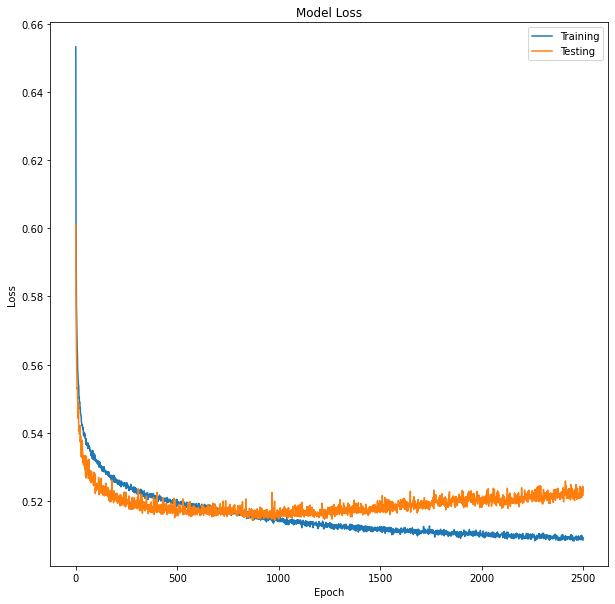

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('patent_loss.png')
plt.show()